# **Question 1**

In [69]:
# Importing required packages

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [70]:
# Setting w0 and w1

w0 = 5*2*pi
w1 = 10*2*pi

In [71]:
# Setting a suitable time period (faster than Nyquist period)
# in order to obtian oscillations in the sampled waveform

T = 1/50

In [72]:
sample_times = np.linspace(0, 511*T, 512)

In [73]:
# Evaluating sampled sinusoids

sin_w0 = np.sin(w0*sample_times)
sin_w1 = np.sin(w1*sample_times)

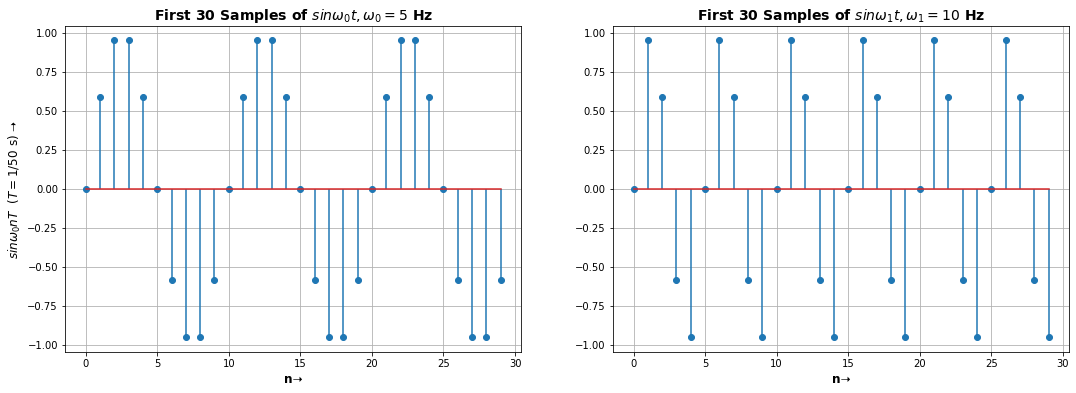

In [132]:
# Plotting sampled sinuoids in time domain

fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].stem(sin_w0[:30], use_line_collection=True)
ax[0].grid(True)
ax[0].set_title('First 30 Samples of $sin\omega_0t, \omega_0=5$ Hz', fontweight ='bold', fontsize = 14)
ax[0].set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax[0].set_ylabel('$sin\omega_0nT$  $(T= 1/50$ s) \u279d', fontsize = 12)
ax[1].stem(sin_w1[:30], use_line_collection=True)
ax[1].grid(True)
ax[1].set_title('First 30 Samples of $sin\omega_1t, \omega_1=10$ Hz', fontweight ='bold', fontsize = 14)
ax[1].set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
plt.show()

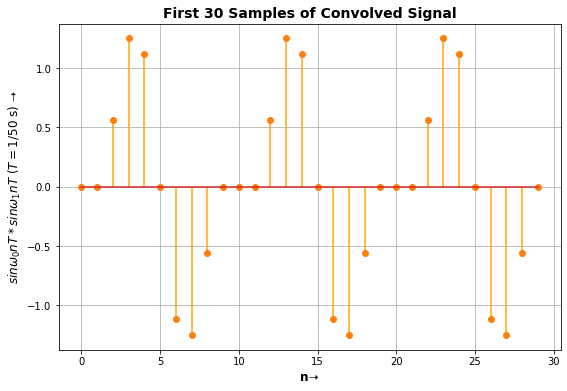

In [136]:
# Convolving the two sinusoids (result is 512+512-1 = 1023-point)

convolved = np.convolve(sin_w0, sin_w1)

# Plotting convolved signal (orange) in time domain

fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.stem(convolved[:30], linefmt='orange', markerfmt='C1o', use_line_collection=True)
ax.set_title('First 30 Samples of Convolved Signal', fontweight ='bold', fontsize = 14)
ax.set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax.set_ylabel('$sin\omega_0nT * sin\omega_1nT$ $(T= 1/50$ s) \u279d', fontsize = 12)
ax.grid(True)
plt.show()

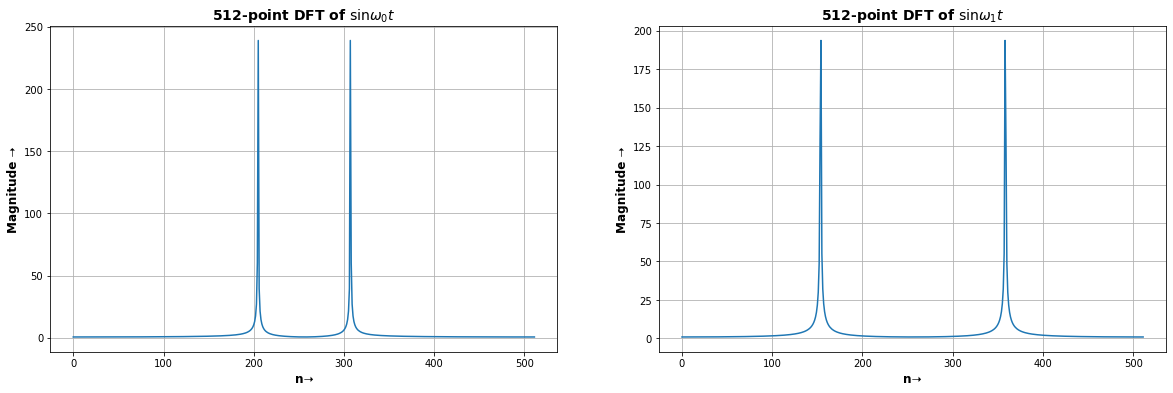

In [137]:
# Plotting the 512-point DFT of the 512-point sinusoids

sin_w0_fft = np.fft.fftshift(np.fft.fft(sin_w0))
sin_w1_fft = np.fft.fftshift(np.fft.fft(sin_w1))

fig1, ax1 = plt.subplots(1,2, figsize=(20, 6))
ax1[0].plot(np.abs(sin_w0_fft))
ax1[0].set_title('512-point DFT of $\sin\omega_0t$', fontweight ='bold', fontsize = 14)
ax1[0].set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax1[0].set_ylabel('Magnitude \u279d', fontweight = 'bold', fontsize = 12)
ax1[0].grid(True)
ax1[1].plot(np.abs(sin_w1_fft))
ax1[1].set_title('512-point DFT of $\sin\omega_1t$', fontweight ='bold', fontsize = 14)
ax1[1].set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax1[1].set_ylabel('Magnitude \u279d', fontweight = 'bold', fontsize = 12)
ax1[1].grid(True)
plt.show()

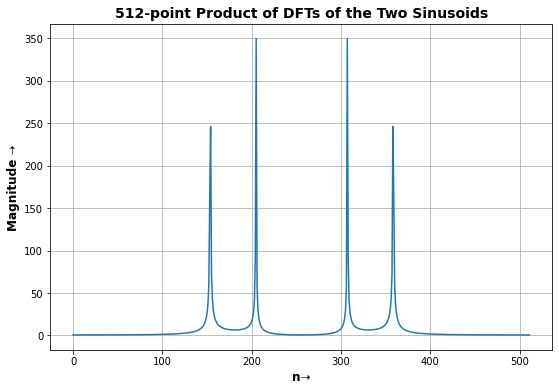

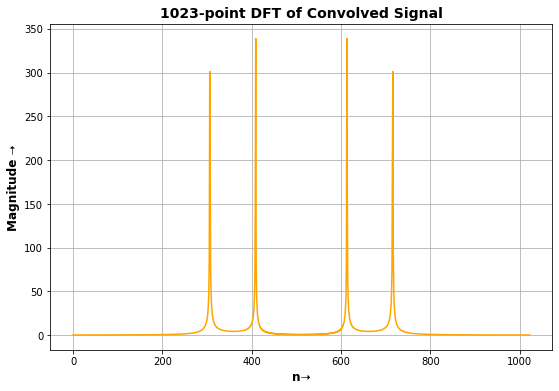

In [139]:
# Plotting the product 512-point DFT

fig2, ax2 = plt.subplots(1,1, figsize=(9, 6))
ax2.plot(np.abs(sin_w0_fft*sin_w1_fft))
ax2.set_title('512-point Product of DFTs of the Two Sinusoids', fontweight ='bold', fontsize = 14)
ax2.set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax2.set_ylabel('Magnitude \u279d', fontweight = 'bold', fontsize = 12)
ax2.grid(True)
plt.show()

# Comparing with the 1023-point DFT of the convolved signal

convolved_fft = np.fft.fftshift(np.fft.fft(convolved))
fig2, ax3 = plt.subplots(1,1, figsize=(9, 6))
ax3.plot(np.abs(convolved_fft), 'orange')
ax3.set_title('1023-point DFT of Convolved Signal', fontweight ='bold', fontsize = 14)
ax3.set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
ax3.set_ylabel('Magnitude \u279d', fontweight = 'bold', fontsize = 12)
ax3.grid(True)
plt.show()

# **Question 2**

In [4]:
# Importing required packages

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


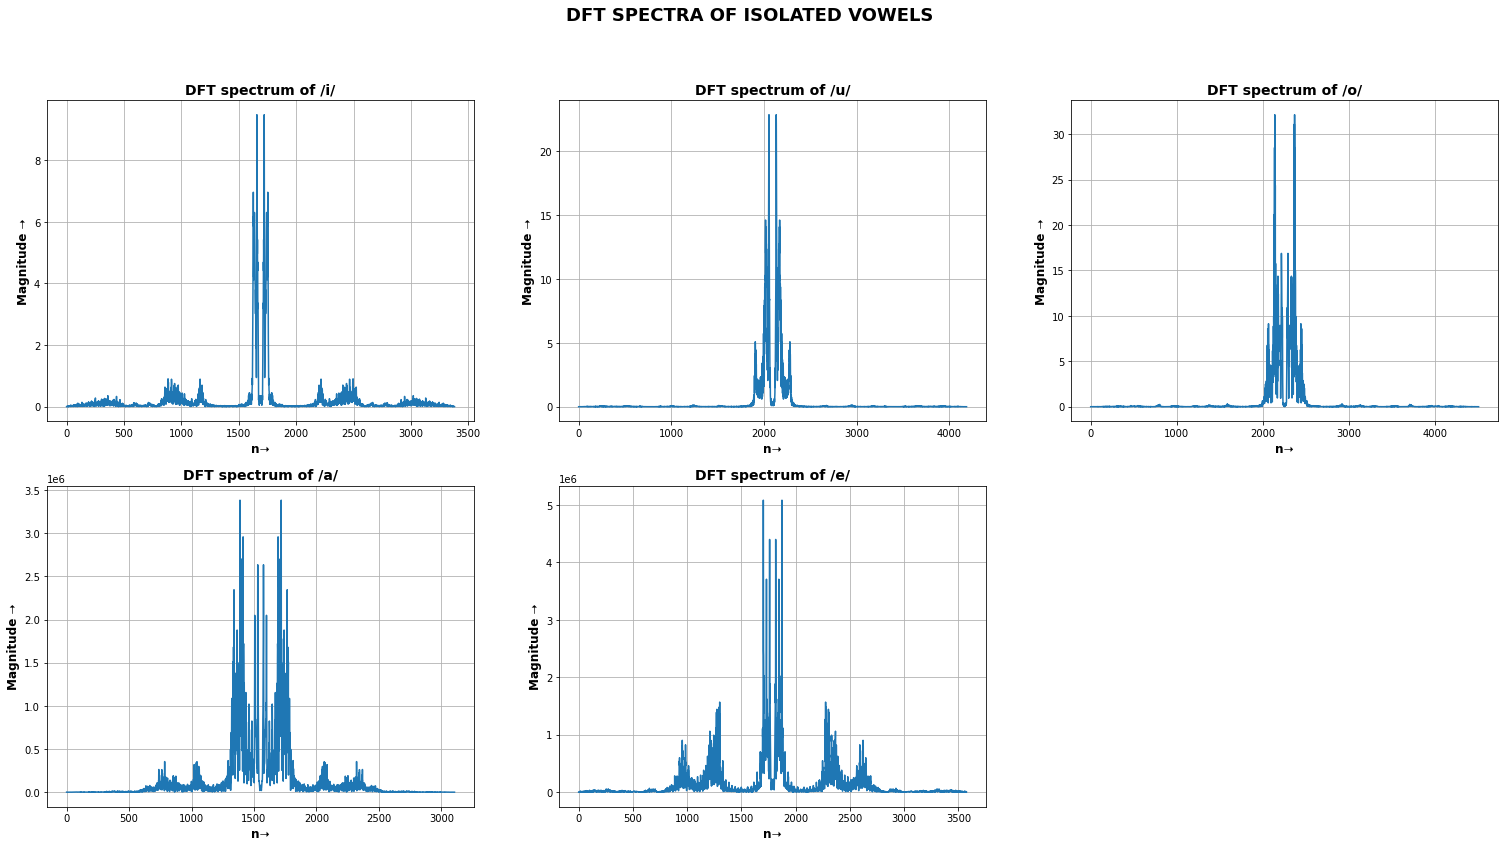

In [178]:
fig, ax = plt.subplots(2,3,figsize=(26,13))
fig.suptitle("DFT SPECTRA OF ISOLATED VOWELS", fontweight = 'bold', fontsize = 18)

# Iterating through the isolated vowels .wav files and plotting DFT
# DFTs are of variable length because the .wav files are of variable length
for i, fname in enumerate(os.listdir('isolated_vowels')):
    samplerate, data = wavfile.read('isolated_vowels/'+fname)
    data_fft = np.fft.fftshift(np.fft.fft(data))

    # Plotting DFT
    ax[int(i/3), i%3].plot(np.abs(data_fft))
    ax[int(i/3), i%3].grid(True)
    ax[int(i/3), i%3].set_title('DFT spectrum of /'+fname[0]+'/', fontweight ='bold', fontsize = 14)
    ax[int(i/3), i%3].set_xlabel('n\u279d', fontweight = 'bold', fontsize = 12)
    ax[int(i/3), i%3].set_ylabel('Magnitude \u279d', fontweight = 'bold', fontsize = 12)

fig.delaxes(ax[int(i/3), (i%3)+1])
plt.show()

In [153]:
# Extracting the isolated vowel formants F1 and F2 from .frm files

directory = 'vowel_formants'
vowel_formants = {}
for fname in os.listdir(directory):
        f1_f2 = []
        with open (directory+'/'+fname) as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                f1_f2.append(line.split()[:2])
        f1_f2 = np.array(f1_f2).astype(np.float)
        vowel_formants[fname[:-4]] = f1_f2

In [154]:
# Calculating average values of F1 and F2

f1, f2 = {}, {}
vowels = ['a', 'e', 'i', 'o', 'u']

for vowel in vowels:
    f1[vowel] = np.mean(vowel_formants[vowel][:,0])
    f2[vowel] = np.mean(vowel_formants[vowel][:,1])

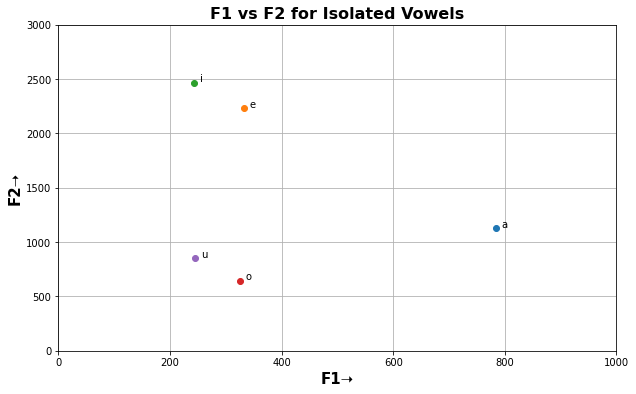

In [155]:
# Plotting F1 vs F2 for the isolated vowels

xaxis, yaxis = [], []

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for vowel in vowels:
    xaxis.append(f1[vowel])
    yaxis.append(f2[vowel])
    ax.scatter(f1[vowel],f2[vowel])

ax.set_xlim(0, 1000)
ax.set_ylim(0, 3000)
ax.set_title('F1 vs F2 for Isolated Vowels', fontweight ='bold', fontsize = 16)
ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 15)
ax.grid(True)

for i, label in enumerate(vowels):
    plt.annotate(label, (xaxis[i]+10, yaxis[i]+10))

plt.show()

# **Question 3**

In [156]:
# Extracting the UV-UA consonant formants F1 and F2 from .frm files

directory = 'uv_ua_formants'
uv_ua_formants = {}

# Preparing a list of UV-UA consonants to iterate through them
uv_ua_consonants = []       

for fname in os.listdir(directory):
        f1_f2 = []
        with open (directory+'/'+fname) as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                f1_f2.append(line.split()[:2])
        f1_f2 = np.array(f1_f2).astype(np.float)
        uv_ua_formants[fname[:-4]] = f1_f2
        uv_ua_consonants.append(fname[:-4])

f1, f2 = {}, {}

# Calculating average values of F1 and F2

for cons in uv_ua_consonants:
    f1[cons] = np.mean(uv_ua_formants[cons][:,0])
    f2[cons] = np.mean(uv_ua_formants[cons][:,1])

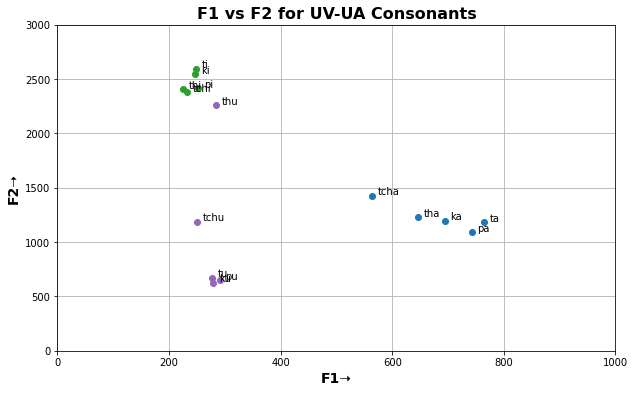

In [157]:
# Plotting F1 vs F2

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for vowel in vowels:
    xaxis, yaxis = [], []
    for cons in uv_ua_consonants:
        if cons[-1]==vowel:
            xaxis.append(f1[cons])
            yaxis.append(f2[cons])
            ax.annotate(cons, (f1[cons]+10, f2[cons]+10))
    ax.scatter(xaxis, yaxis)

ax.set_xlim(0, 1000)
ax.set_ylim(0, 3000)
ax.set_title('F1 vs F2 for UV-UA Consonants', fontweight ='bold', fontsize = 16)
ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
ax.grid(True)
    
plt.show()

In [158]:
# Extracting the UV-A consonant formants F1 and F2 from .frm files

directory = 'uv_a_formants'
uv_a_formants = {}

# Preparing a list of UV-UA consonants to iterate through them
uv_a_consonants = []

for fname in os.listdir(directory):
        f1_f2 = []
        with open (directory+'/'+fname) as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                f1_f2.append(line.split()[:2])
        f1_f2 = np.array(f1_f2).astype(np.float)
        uv_a_formants[fname[:-4]] = f1_f2
        uv_a_consonants.append(fname[:-4])

f1, f2 = {}, {}

# Calculating average values of F1 and F2

for cons in uv_a_consonants:
    f1[cons] = np.mean(uv_a_formants[cons][:,0])
    f2[cons] = np.mean(uv_a_formants[cons][:,1])

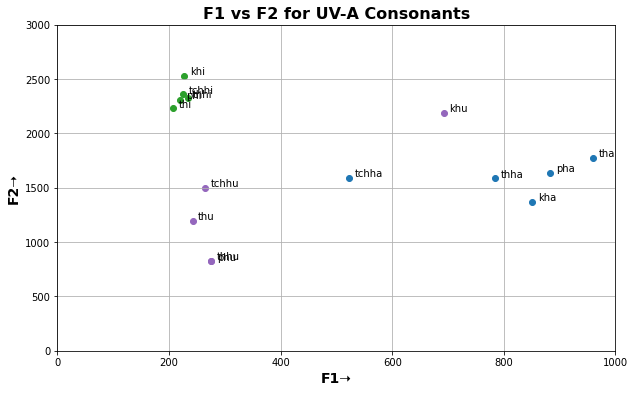

In [159]:
# Plotting F1 vs F2

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for vowel in vowels:
    # Iterating through vowels to give a different colour to each vowel group
    xaxis, yaxis = [], []
    for cons in uv_a_consonants:
        if cons[-1]==vowel:
            xaxis.append(f1[cons])
            yaxis.append(f2[cons])
            ax.annotate(cons, (f1[cons]+10, f2[cons]+10))
    ax.scatter(xaxis, yaxis)
    
ax.set_xlim(0, 1000)
ax.set_ylim(0, 3000)
ax.set_title('F1 vs F2 for UV-A Consonants', fontweight ='bold', fontsize = 16)
ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
ax.grid(True)
    
plt.show()

In [161]:
# Extracting the V-UA consonant formants F1 and F2 from .frm files

directory = 'v_ua_formants'
v_ua_formants = {}

# Preparing a list of V-UA consonants to iterate through them
v_ua_consonants = []

for fname in os.listdir(directory):
        f1_f2 = []
        with open (directory+'/'+fname) as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                f1_f2.append(line.split()[:2])
        f1_f2 = np.array(f1_f2).astype(np.float)
        v_ua_formants[fname[:-4]] = f1_f2
        v_ua_consonants.append(fname[:-4])

f1, f2 = {}, {}

# Calculating average values of F1 and F2

for cons in v_ua_consonants:
    f1[cons] = np.mean(v_ua_formants[cons][:,0])
    f2[cons] = np.mean(v_ua_formants[cons][:,1])

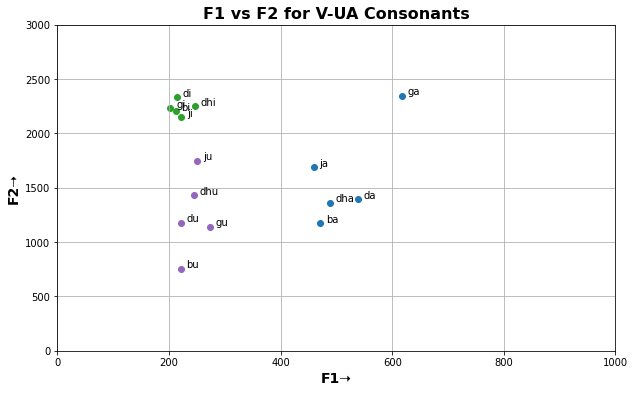

In [163]:
# Plotting F1 vs F2

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for vowel in vowels:
    # Iterating through vowels to give a different colour to each vowel group
    xaxis, yaxis = [], []
    for cons in v_ua_consonants:
        if cons[-1]==vowel:
            xaxis.append(f1[cons])
            yaxis.append(f2[cons])
            ax.annotate(cons, (f1[cons]+10, f2[cons]+10))
    ax.scatter(xaxis, yaxis)
    
ax.set_xlim(0, 1000)
ax.set_ylim(0, 3000)
ax.set_title('F1 vs F2 for V-UA Consonants', fontweight ='bold', fontsize = 16)
ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
ax.grid(True)
    
plt.show()

In [164]:
# Extracting the V-A consonant formants F1 and F2 from .frm files

directory = 'v_a_formants'
v_a_formants = {}

# Preparing a list of V-A consonants to iterate through them
v_a_consonants = []

for fname in os.listdir(directory):
        f1_f2 = []
        with open (directory+'/'+fname) as f:
            while(True):
                line = f.readline()
                if not line:
                    break
                f1_f2.append(line.split()[:2])
        f1_f2 = np.array(f1_f2).astype(np.float)
        v_a_formants[fname[:-4]] = f1_f2
        v_a_consonants.append(fname[:-4])

f1, f2 = {}, {}

for cons in v_a_consonants:
    f1[cons] = np.mean(v_a_formants[cons][:,0])
    f2[cons] = np.mean(v_a_formants[cons][:,1])

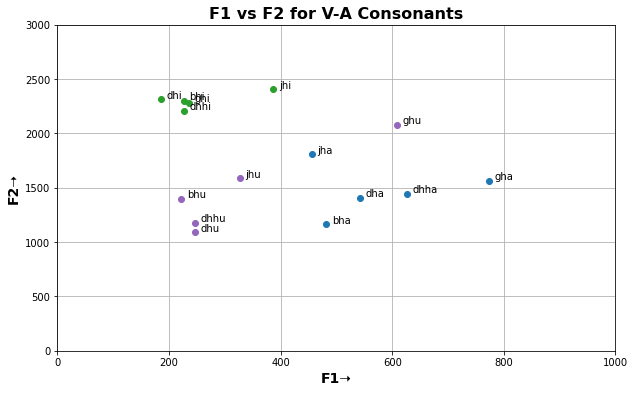

In [167]:
# Plotting F1 vs F2

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for vowel in vowels:
    # Iterating through vowels to give a different colour to each vowel group
    xaxis, yaxis = [], []
    for cons in v_a_consonants:
        if cons[-1]==vowel:
            xaxis.append(f1[cons])
            yaxis.append(f2[cons])
            ax.annotate(cons, (f1[cons]+10, f2[cons]+10))
    ax.scatter(xaxis, yaxis)
    
ax.set_xlim(0, 1000)
ax.set_ylim(0, 3000)
ax.set_title('F1 vs F2 for V-A Consonants', fontweight ='bold', fontsize = 16)
ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
ax.grid(True)
    
plt.show()

# **Question 4**

In [ ]:
# Importing required packages

import numpy as np

In [67]:
# Calculating pitch period for ai using pitch contours

lines = []
with open('ai.f0', 'r') as f:
    while(True):
        line = f.readline()
        if not line:
            break
        lines.append(line.split())

pitch_freqs = np.array(lines)[:,0].astype(float)

# Taking minimum pitch frequency to calculate pitch period
pitch_freq = np.min(pitch_freqs)

pitch_period_ai = 1/pitch_freq
print("Pitch period for /ai/ is", pitch_period_ai, "seconds")
print("No of points at 16000 samples/sec =", pitch_period_ai*16000)

Pitch period for /ai/ is 0.010792846708837203 seconds
No of points at 16000 samples/sec = 172.68554734139525


In [68]:
# Calculating pitch period for ao using pitch contours

lines = []
with open('ao.f0', 'r') as f:
    while(True):
        line = f.readline()
        if not line:
            break
        lines.append(line.split())

pitch_freqs = np.array(lines)[:,0].astype(float)

# Taking minimum pitch frequency to calculate pitch period
pitch_freq = np.min(pitch_freqs)

pitch_period_ao = 1/pitch_freq
print("Pitch period for /ao/ is", pitch_period_ao, "seconds")
print("No of points at 16000 samples/sec =", pitch_period_ao*16000)

Pitch period for /ao/ is 0.010746988335099872 seconds
No of points at 16000 samples/sec = 171.95181336159794


# **Question 6**

In [35]:
# Importing required packages

import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
# Initialising lists to store the frequencies of tones and 
# corresponding discernible dB amplitudes (relative to noise amplitude)

freqs, relative_dbs = [], []
reference_db = 0

# Opening a txt file in which we have written the amplitudes of noise and tones
with open('tones_audible_dbs.txt', 'r') as f:
    while(True):
        line = f.readline()
        if not line:
            break
        if line.split()[0]=='Noise':
            reference_db = float(line.split()[1])  # Setting reference_db as noise level
        else:        
            freqs.append(float(line.split()[0]))
            relative_dbs.append(float(line.split()[1])-reference_db)

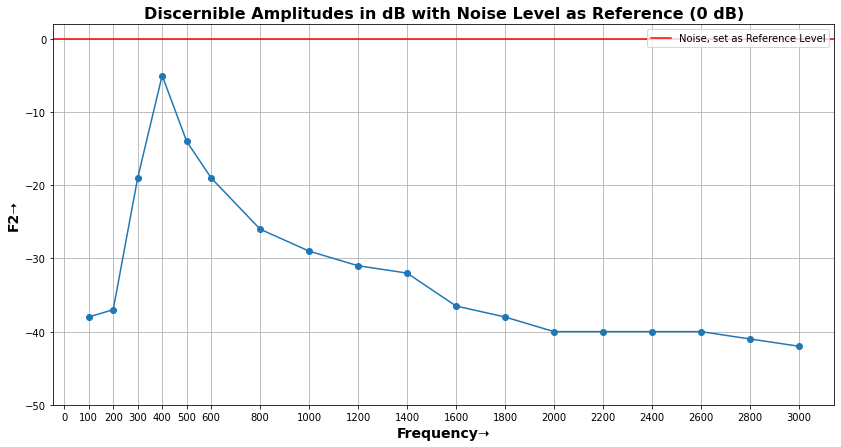

In [172]:
# Plotting the frequencies vs relative discernible amplitudes in dB

plt.figure(figsize=(14,7))
plt.plot(freqs, relative_dbs, 'o-')
plt.axhline(y = 0, color = 'r', linestyle = '-', label='Noise, set as Reference Level') 
plt.title('Discernible Amplitudes in dB with Noise Level as Reference (0 dB)', fontweight ='bold', fontsize = 16)
plt.xlabel('Frequency\u279d', fontweight = 'bold', fontsize = 14)
plt.ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
plt.ylim(-50,2)
plt.xticks([0,100,200,300,400,500,600,800,1000,1200,1400,1600,1800,2000,
            2200,2400,2600,2800,3000])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# **Question 7**

In [1]:
# Importing required packages

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

In [ ]:
## Code used to automate the extraction of vowel pieces from Lab 1 sentences
## using label files

## This is necessary to obtain formants from .wav files using Wavesurfer
"""
vowels = ['a', 'e', 'i', 'o', 'u']

for vowel in vowels:
    os.mkdir(vowel)
"""

In [19]:
"""
count = 0
for fname in os.listdir('lab1sentences'):
  if fname[-4:] == '.wav':
    samplerate, data = wavfile.read('lab1sentences/'+fname)
    wavfile.write(fname, samplerate, data)
    labelfile = 0
    for lname in os.listdir('lab1vowellabels'):
        # Choosing the right label file for the right .wav file
        if lname[:4]==fname[:4]:
            labelfile = 'lab1vowellabels/'+lname
    starts_ends = []
    with open(labelfile, 'r') as lbl:
        while(True):
            line = lbl.readline()
            if not line:
                break
            starts_ends.append(line.split())
    
    for line in starts_ends:
        vowel = line[2]
        if vowel in vowels:
            count+=1
            start = float(line[0])
            end = float(line[1])
            vowel_audio = data[int(start*samplerate)+1:int(end*samplerate)+1]
            wavfile.write(vowel+'/'+str(count)+'.wav', samplerate, vowel_audio)
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [21]:
## Helper code used to download the written .wav vowel files from Google Colab
## to my system
"""
from google.colab import files
for fname in os.listdir('a'):
    files.download('a/'+fname)

for fname in os.listdir('e'):
    files.download('e/'+fname)

for iname in os.listdir('i'):
    files.download('i/'+iname)

for fname in os.listdir('o'):
    files.download('o/'+fname)

for fname in os.listdir('u'):
    files.download('u/'+fname)
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

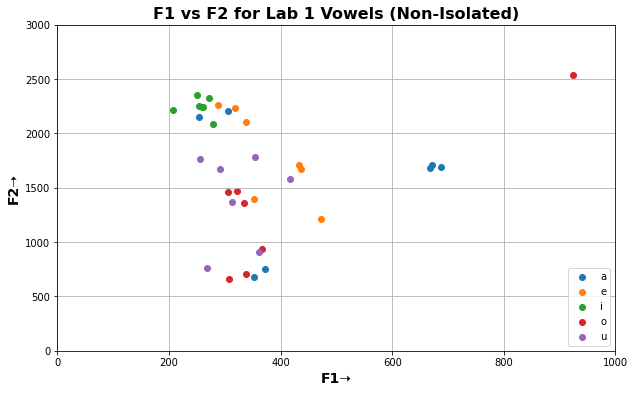

In [175]:
# Plotting F1 vs F2 for Lab 1 Vowel data

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

vowels = ['a', 'e', 'i', 'o', 'u']

for vowel in vowels:
# Iterating through vowels to give a different colour to each vowel group
    vowels_formants = []
    directory = 'lab1_'+vowel+'_formants'
    for fname in os.listdir(directory):
            f1_f2 = []
            with open (directory+'/'+fname) as f:
                while(True):
                    line = f.readline()
                    if not line:
                        break
                    f1_f2.append(line.split()[:2])
            f1_f2 = np.array(f1_f2).astype(np.float)
            f1 = np.mean(f1_f2[:,0])
            f2 = np.mean(f1_f2[:,1])
            vowels_formants.append([f1, f2])
    
    vowels_formants = np.array(vowels_formants)
    xaxis = vowels_formants[:,0]
    yaxis = vowels_formants[:,1]

    ax.scatter(xaxis, yaxis, label=vowel)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 3000)
    ax.set_title('F1 vs F2 for Lab 1 Vowels (Non-Isolated)', fontweight ='bold', fontsize = 16)
    ax.set_xlabel('F1\u279d', fontweight = 'bold', fontsize = 14)
    ax.set_ylabel('F2\u279d', fontweight = 'bold', fontsize = 14)
    ax.grid(True)

plt.legend(loc='lower right')
plt.show()

_______________________________________________________________